In [ ]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop
from PIL import Image
from matplotlib import pyplot as plt

In [ ]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [ ]:
len(image_paths["train_normal"])

250

size of image : (512, 512, 3)


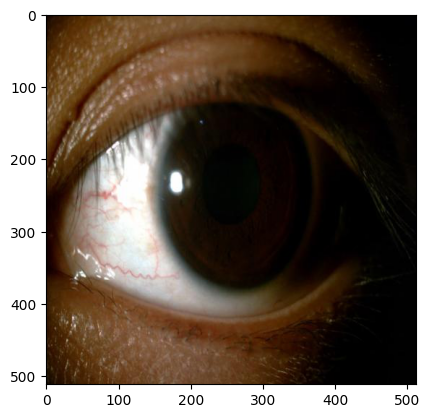

In [ ]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (200, 200, 3)


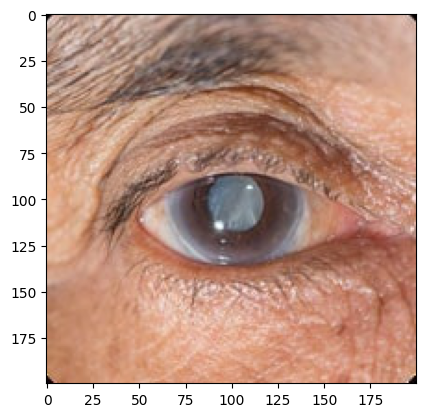

In [ ]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [ ]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1/25,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.5

)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [ ]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 10, 128)      

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(monitor='accuracy', patience=5)

history = model.fit(
    train_generator,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/15
 2/22 [=>............................] - ETA: 20s - loss: 14.8382 - accuracy: 0.4844

c:\Users\HP\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


22/22 [==============================] - 27s 1s/step - loss: 2.3818 - accuracy: 0.6096
Epoch 2/15
22/22 [==============================] - 24s 1s/step - loss: 0.6603 - accuracy: 0.6604
Epoch 3/15
22/22 [==============================] - 28s 1s/step - loss: 0.5809 - accuracy: 0.7097
Epoch 4/15
22/22 [==============================] - 24s 1s/step - loss: 0.6199 - accuracy: 0.7417
Epoch 5/15
22/22 [==============================] - 27s 1s/step - loss: 0.5395 - accuracy: 0.7808
Epoch 6/15
22/22 [==============================] - 24s 1s/step - loss: 0.4479 - accuracy: 0.7983
Epoch 7/15
22/22 [==============================] - 25s 1s/step - loss: 0.4114 - accuracy: 0.8374
Epoch 8/15
22/22 [==============================] - 24s 1s/step - loss: 0.3573 - accuracy: 0.8534
Epoch 9/15
22/22 [==============================] - 24s 1s/step - loss: 0.4365 - accuracy: 0.8128
Epoch 10/15
22/22 [==============================] - 23s 1s/step - loss: 0.4059 - accuracy: 0.8505
Epoch 11/15
22/22 [===========

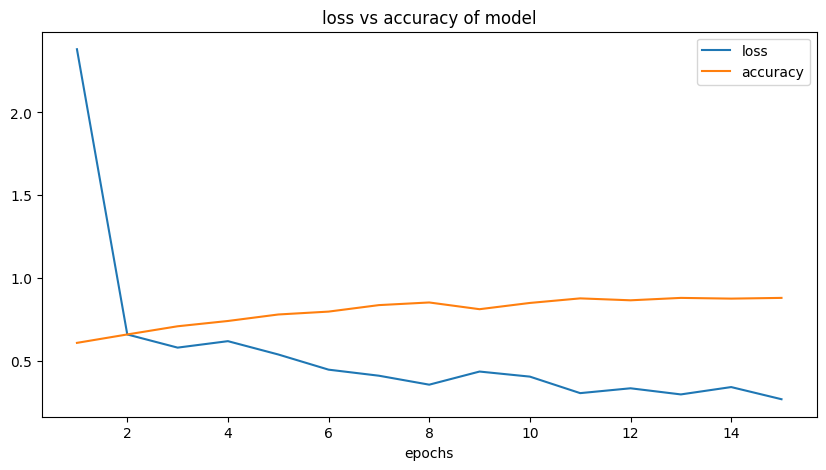

In [ ]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [ ]:
def predict_image(file_path):
    # Load image
    img = image.load_img(file_path, target_size=target_size)
  
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    
    # Display the image
    plt.imshow(img)
    plt.show()
    
    prediction = model.predict(img_batch)
    
    # predict output
    if prediction[0] > 0.5:
        print("Normal")
    else:
        print("Cataract")

# ganti file_path dengan path foto yang akan di prediksi
predict_image("D:/cataract (474).jpg")